# SAT Performance in NYC High Schools - Part 2

In part 2 of this three-part project, I will examine how various factors are related to New York City high school students' performance on the SAT exam. In the previous section, I cleaned eight different datasets and combined them into a single dataset. In part 3 of this project, I will organize the schools by district and create some maps of NYC showing the locations of these districts.

The SAT exam is a placement test that American universities use in order to help determine which students to accept. The SAT has three sections, each of which is worth a maximum of 800 points. A high school's average SAT score is also often used as an indicator of the quality of the school's curriculum.

## 1. Determining Which Demographic Factors Affect SAT Score

In this section, I will examine how various factors are corerlated with performance on the SAT exam. First, I will import the appropriate modules and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
combined = pd.read_csv("combined.csv")
combined.head(3)

,DBN,District,School,SAT Score,SAT Test Takers,AP Test Takers,AP Tests Taken,Total Enrollment,Class Size,Percent Male,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent ELL,Teacher Safety,Student Safety,Lat,Lon
0,01M292,1,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,1122,29,129,197,422,22.6,61.4,1.7,29.1,53.8,14.0,22.3,6.3,6.0,40.7138,-73.9853
1,01M448,1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,1172,91,39,49,394,22.2,57.4,2.3,22.6,45.9,29.2,21.1,6.6,6.0,40.7123,-73.9848
2,01M450,1,EAST SIDE COMMUNITY SCHOOL,1149,70,19,21,598,21.2,54.7,10.4,23.9,55.4,9.7,5.0,7.3,6.6,40.7298,-73.9830


### a) Correlations

Before I speculate as to the relationships between the columns in dataset, I will first use the corr method in order to find the correlations between the SAT Score column and the other columns in the dataset.

In [3]:
correlations = combined.corr()
correlations = correlations["SAT Score"]
print(correlations)

District            0.042993
SAT Score           1.000000
AP Test Takers      0.523162
AP Tests Taken      0.514351
Total Enrollment    0.367956
Class Size          0.381824
Percent Male       -0.112027
Percent White       0.620722
Percent Black      -0.284101
Percent Hispanic   -0.397018
Percent Asian       0.570717
Percent ELL        -0.398792
Teacher Safety      0.313816
Student Safety      0.337565
Lat                -0.121042
Lon                -0.132237
Name: SAT Score, dtype: float64


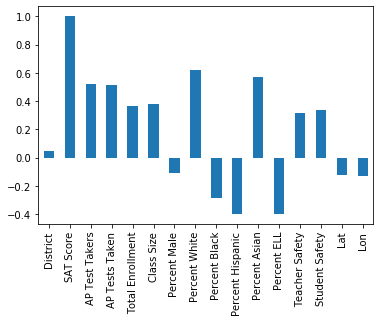

In [4]:
correlations.plot.bar()

First, note that the columns District, Lat, and Lon are indicators of location and therefore are unmalleable. Even if there is a small correlation between these factors and performance on the SAT exam, these factors are impossible to adjust and thus not useful to analyze.

There is a significant positive correlation between SAT Score and AP Test Takers and AP Tests Taken. However, note that Total Enrollment also has a positive correlation with SAT Score. Since AP Test Takers and AP Tests Taken do not account for the size of the school (ex. a school of 500 people with 200 AP Test Takers has more AP Tests taken per person than a school of 1000 people with 201 AP Test Takers), I will adjust these columns so they account for the size of the schools and then re-examine the correlations.

Both Total Enrollment and Class Size are positively correlated with performance on the SAT exam. This is rather surprising, as many academic cicles are actively encouraging schools to decrease the size of classrooms as they assume students perform better when they receive more one-on-one time with the teacher. 

Percent Male is slightly negatively correlated with performace on the SAT Exam. This suggests that on average women slightly outperform men on the SAT exam.

Percent White and Percent Asian are very positively correlated with SAT performance whereas Percent Black and Percent Hispanic are very negatively correlated with SAT performace. This could be an indicator that schools in areas with many white and Asian students better prepare their students for the SAT exam. Hispanics might also perform poorly on the SAT exam than the other races due to the fact that a higher proportion of their students are ELL students.

Unsurprisingly, Percent ELL is negatively correlated with performance on the SAT exam. Considering one third of the exam tests students on their reading comprehension and another third tests them on their writing ability, it makes sense that students who aren't fluent in English struggle on these two parts of the exam.

And finally, there is a positive correlation between both teacher and student safety and performance on the SAT exam. I assume this is because students who attend schools they consider safe are more likely to have a strong family and/or community support system and thus more likely to be encouraged to succeed in school.

### b) Adjusting AP Test Variables for Size of the School

Next, I will adjust the AP Test Takers and AP Tests Taken variables. The Percent AP Test Takers column will reflect the percentage of students at a given school who have taken an AP exam. Similarly, the Percent AP Tests Taken column will reflect the ratio of total AP tests taken by all students at a school to the number of students at the school.

In [5]:
combined = combined.rename(columns={
                        "AP Test Takers": "Percent AP Test Takers",
                        "AP Tests Taken": "Percent AP Tests Taken"
})

combined["Percent AP Test Takers"] = (combined["Percent AP Test Takers"] / combined["Total Enrollment"]) * 100
combined["Percent AP Tests Taken"] = (combined["Percent AP Tests Taken"] / combined["Total Enrollment"]) * 100

combined["Percent AP Test Takers"] = combined["Percent AP Test Takers"].round(1)
combined["Percent AP Tests Taken"] = combined["Percent AP Tests Taken"].round(1)


In [6]:
correlations = combined.corr()
correlations = correlations["SAT Score"]
print(correlations)

District                  0.042993
SAT Score                 1.000000
Percent AP Test Takers    0.057030
Percent AP Tests Taken    0.075457
Total Enrollment          0.367956
Class Size                0.381824
Percent Male             -0.112027
Percent White             0.620722
Percent Black            -0.284101
Percent Hispanic         -0.397018
Percent Asian             0.570717
Percent ELL              -0.398792
Teacher Safety            0.313816
Student Safety            0.337565
Lat                      -0.121042
Lon                      -0.132237
Name: SAT Score, dtype: float64


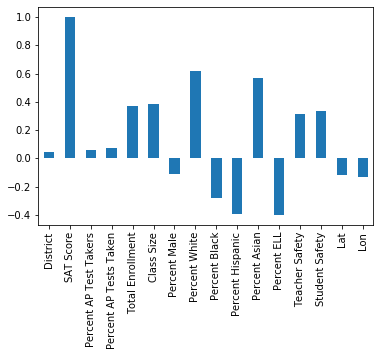

In [7]:
correlations.plot.bar()

There is a very small positive correlation between SAT Score and the Percent AP Test Takers and Percent AP Tests Taken columns. This suggests that most of the correlation between SAT Score and the original AP tests variables was due the positive correlation between SAT Score and Total Enrollment. Since there are more AP test takers (and AP tests taken) in large schools, the original AP test variables are only positively correlated with SAT Score because they a large number of AP test takers or AP tests taken is indicative of a larger school.

## 2. Comparing the Various Factors to SAT Score

I will create a series of scatter plots in order to visualize the correlation between SAT Score and the following:
- Total Enrollment
- Class Size
- Percent White
- Percent Black
- Percent Hispanic
- Percent Asian
- Percent ELL
- Percent Male
- Percent Teacher Safety
- Percent Student Safety

Before I begin my analysis, I will create a function that assists me in creating a series of scatter plots so that I can easily analyze the various correlations.

In [8]:
def make_scatterplot(dataset, depend_var, *indep_vars):
    
    length = len(indep_vars)
    
    # Size of the plot is determined by number of independent variables
    if length < 3:
        fig_width = length * 6
        fig_height = 5
    else:
        fig_width = 12
        fig_height = 10
    
    fig = plt.figure(figsize=(fig_width, fig_height))
    
    for sp in range(length):
        current_var = indep_vars[sp]
        
        # Fixes the fontsize on the labels to 16
        plt.rcParams['xtick.labelsize']=16
        plt.rcParams['ytick.labelsize']=16
        
        # Possible color arrangements
        point_color = ["Blue", "Green", "Orange", "Red"]
        
        # Scatterplot orientation is based on number of independent variables
        if length < 2:
            num_wide = 1
            num_tall = 1
        else:
            num_wide = 2
            num_tall = (length + 1) / 2
        
        ax = fig.add_subplot(num_tall, num_wide, sp+1)
        
        ax.set_title(current_var, fontsize=24, pad=10)
        
        ax.scatter(x=dataset[depend_var], 
                   y=dataset[current_var],
                   c=point_color[sp],
                   edgecolor="Black",
                   alpha=0.7,
                   s=50)
        
        ax.set_xlabel(depend_var, fontsize=18)
        ax.set_ylabel(current_var, fontsize=18)
    
    
    fig.tight_layout(pad=1)

### a) SAT Score vs. Total Enrollment and Class Size

Considering the academic push towards both smaller schools and smaller class sizes, it was interesting to note that both Total Enrollment and Class Size are positively correlated with performance on the SAT exam. I will create scatterplots that show the relationship between each variable and SAT score and then further examine the reasons as to why the relationship exists.

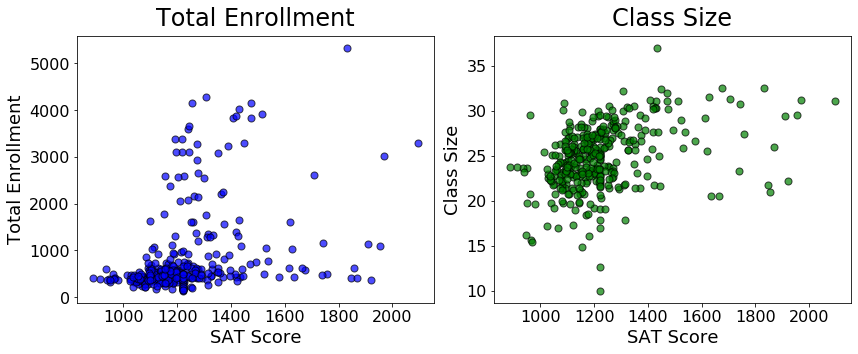

In [9]:
make_scatterplot(combined, "SAT Score", "Total Enrollment", "Class Size")

Next I will calculate the average number of students per school as well as the average class size of each school.

In [10]:
avg_enroll = round(combined["Total Enrollment"].mean())
avg_class = round(combined["Class Size"].mean())

print("The average school has {0} students and an average class size of {1} students.".format(avg_enroll, avg_class))

The average school has 793 students and an average class size of 25 students.


Note that all of the schools with an average SAT of below 1000 have very few students, and it looks as though every school has below the average number of students. I will take a look at the names of these schools with an SAT score of less than 1000 to see if their names indicate something that might help me determine why their average SAT scores are so low, as well as to why they have so few students.

In [11]:
SAT_below_1000 = combined[combined["SAT Score"] < 1000]

SAT_below_1000[["School", "SAT Score", "Total Enrollment"]].sort_values(by="SAT Score", ascending=False)

,School,SAT Score,Total Enrollment
188,BROOKLYN INTERNATIONAL HIGH SCHOOL,981,367
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,970,406
126,BRONX INTERNATIONAL HIGH SCHOOL,965,403
237,IT TAKES A VILLAGE ACADEMY,963,382
139,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,962,497
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,951,336
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,951,366
91,INTERNATIONAL COMMUNITY HIGH SCHOOL,945,393
179,HIGH SCHOOL OF WORLD CULTURES,939,369
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,934,606


Two noticeable trends about these schools with an average SAT score of less than 1000:
- These schools likely have a high number of English Language Learners.
    - All but one of the school names has a word (such as "International", "Cultural", or "Multicutural") that indicates it might be a school for recent immigrants.
    - Considering that two out of three of the sections on the SAT exam focus on English mastery, a lack of English fluency would explain why the average student at these schools performs poorly on the exam. 
- Only one school has more than 500 students (the only exception is still above average), which suggests that the size of the schools is small because they are specialized to help struggling students.

Next I will add the "Percent ELL" column to the data table above so I can determine whether my hypothesis that these schools have a high number of ELL students is true.

In [12]:
SAT_below_1000[["School", "SAT Score", "Total Enrollment", "Percent ELL"]
              ].sort_values(by="SAT Score", ascending=False)

,School,SAT Score,Total Enrollment,Percent ELL
188,BROOKLYN INTERNATIONAL HIGH SCHOOL,981,367,83.1
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,970,406,92.9
126,BRONX INTERNATIONAL HIGH SCHOOL,965,403,87.1
237,IT TAKES A VILLAGE ACADEMY,963,382,30.4
139,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,962,497,88.7
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,951,336,86.6
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,951,366,91.3
91,INTERNATIONAL COMMUNITY HIGH SCHOOL,945,393,90.1
179,HIGH SCHOOL OF WORLD CULTURES,939,369,86.4
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,934,606,79.9


All but one of the schools on this list has at least 79% of its students in the ELL program, so therefore it is highly likely that the primary reason why these schools perform so poorly on the SAT is that a large percentage of their students struggle with English.

Determining whether universities should take English fluency into account when accepting applicants is a difficult decision. On the one hand, classes at American universities will be taught in English, and therefore it is logical to test applicants for English fluency via the SAT exam. In contrast, many of the students struggling with English could be recent immigrants or live in communities where it is difficult for them to learn English. They could have other skills that aren't dependent on English fluency, such as mathematics or writing in their native language. Thus, they could potentially learn English rapidly and succeed in university if place in the right environment.

There aren't in noteable clumps of data on the Class Size scatterplot to examine further, so I will move on to the next datapoints.

### b) SAT Score vs. Percent English Learners and Percent Male

Since almost all of the low performing schools have a very high percentage of English learners, I will take a look at the relationship between Percent ELL and SAT Score next. I will also graph the relationships between Percent Male and SAT Score.

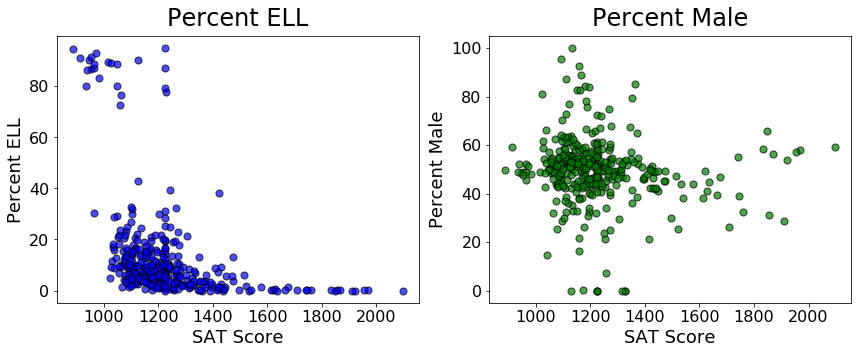

In [13]:
make_scatterplot(combined, "SAT Score", "Percent ELL", "Percent Male")

As noted in the previous section, almost all of the schools with an SAT score under 1000 have a very high number percentage of ELL students. Also note how all of the schools with an average SAT score above 1600 have an extremely low percentage of ELL students and that all of the schools with a percentage of ELL above 60% have a SAT score of less than 1250. I will take a closer look at these two subsets.

In [14]:
SAT_above_1600 = combined[combined["SAT Score"] > 1600]
over_60_percent_ELL = combined[combined["Percent ELL"] > 60]

In [15]:
SAT_above_1600[["School", "SAT Score", "Percent ELL"]].sort_values(by="SAT Score", ascending=False)

,School,SAT Score,Percent ELL
37,STUYVESANT HIGH SCHOOL,2096,0.0
151,BRONX HIGH SCHOOL OF SCIENCE,1969,0.1
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953,0.1
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,1920,0.0
302,TOWNSEND HARRIS HIGH SCHOOL,1910,0.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,1868,0.2
5,BARD HIGH SCHOOL EARLY COLLEGE,1856,0.2
79,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",1847,0.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,1833,0.1
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758,0.2


Out of the top performing schools on the SAT, there is only one school that has a Percent ELL of over 0.5%. Again, since two-thirds of the exam tests English fluency, it makes sense that these schools have very few ELL students. Also note that many of these high school (especially the ones with the highest scores) are college preparatory schools, and thus are able to select the best students based on their merit. Now I will take a look at the schools that have more than 60% of their students in the ELL program.

In [16]:
over_60_percent_ELL[["School", "SAT Score", "Percent ELL"]].sort_values(by="SAT Score", ascending=False)

,School,SAT Score,Percent ELL
36,MANHATTAN INTERNATIONAL HIGH SCHOOL,1227,77.5
31,MANHATTAN ACADEMY FOR ARTS & LANGUAGE,1223,86.9
111,BRONX BRIDGES HIGH SCHOOL,1223,79.4
33,INTERNATIONAL HIGH SCHOOL AT UNION SQUARE,1223,94.9
344,NEWCOMERS HIGH SCHOOL,1127,90.3
291,INTERNATIONAL HIGH SCHOOL AT LAGUARDIA COMMUNI...,1064,76.5
44,MANHATTAN BRIDGES HIGH SCHOOL,1058,72.6
297,FLUSHING INTERNATIONAL HIGH SCHOOL,1049,88.6
166,NEW WORLD HIGH SCHOOL,1048,80.1
265,INTERNATIONAL HIGH SCHOOL AT LAFAYETTE,1026,89.2


Every single high school with more than 60% ELL students has an SAT score of less than 1250. To determine how significantly these schools are performing, I will find the average score on the SAT exam for all NYC high schools and then compare that to the average score on the SAT exam for all NYC high schools with at least 60% ELL students.

In [17]:
print("High schools in NYC have an average score of {} on the SAT exam".format(round(combined["SAT Score"].mean(), 2)))
print("High schools in NYC with at least 60% ELL students have an average score of {} on the SAT exam".format(round(over_60_percent_ELL["SAT Score"].mean(), 2)))


High schools in NYC have an average score of 1223.4 on the SAT exam
High schools in NYC with at least 60% ELL students have an average score of 1030.91 on the SAT exam


The average NYC high school has an average score that is almost 200 points greater than the average NYC high school with at least 60% ELL students. This is a significant difference and suggests that perhaps the SAT exam should be moderated in order to better help out students who don't speak fluent English. 

It doesn't seem as though there are any noteable groups of data in the Percent Male scatterplot. I will check which percentage of high schools have between 40-60% male students.

In [18]:
male_40_60 = combined[(combined["Percent Male"] >= 40) & (combined["Percent Male"] <= 60)]
print("{}% of NYC high schools are between 40-60% male.".format(round(len(male_40_60)*100/len(combined), 1)))


72.5% of NYC high schools are between 40-60% male.


This is rather surprising, as this means over a quarter of high schools in NYC have either more than 60% male students or more than 60% female students. Nevertheless, it doesn't appear as though gender has a profound effect on performance on the SAT exam itself, so I will move on to the next section.

### c) SAT Score vs. Race

Next, I will investigate the relationship between the schools' racial demographics and their students' performance on the SAT exam. This is a sensitive topic, so like all other sections, I will offer a series of possible reasons as to why discrepancies between the racial groups might exist rather than asserting a definitive conclusion.

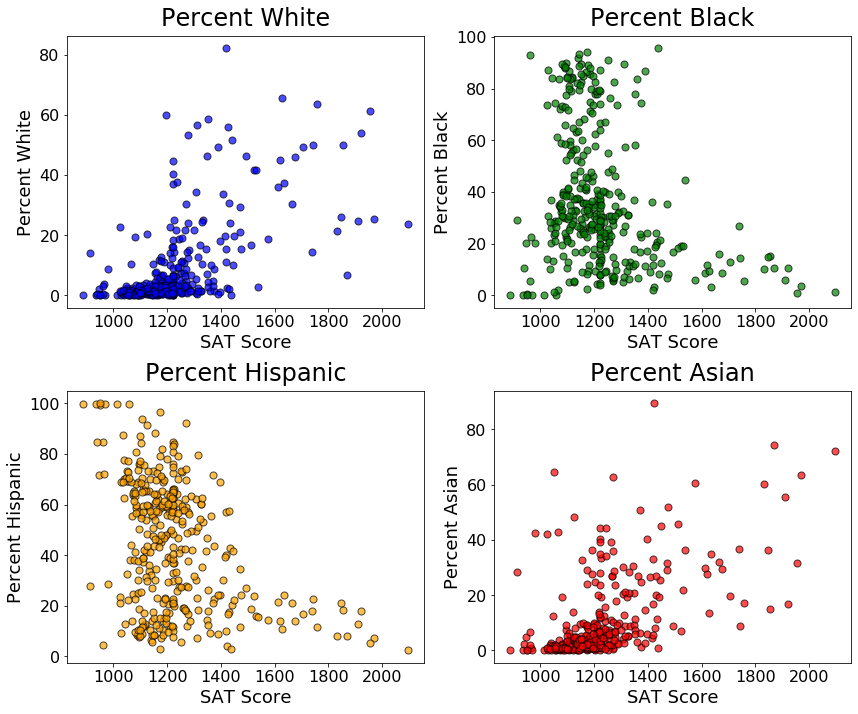

In [19]:
make_scatterplot(combined, "SAT Score", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian")

Based on the scatterplots above, there are two groups of data that I want to investigate further. First, it appears as though there is a very large group of schools that have an SAT score of under 1400, consist of less than 10% white students, and consist of less than 10% Asian students. Second, I will take a look at the subset of schools that have an average SAT score of over 1600, which appear to have very high percentages of white and Asian students but very low percentages of black and Hispanic students.

Before I begin my analysis, it will be useful to get a demographic breakdown of NYC high schools in general. Note that this will be a rough estimate, as I will not be accounting for the differences in number of students between high schools, but it will serve my purposes.

In [20]:
white = round(combined["Percent White"].mean(), 1)
black = round(combined["Percent Black"].mean(), 1)
hispanic = round(combined["Percent Hispanic"].mean(), 1)
asian = round(combined["Percent Asian"].mean(), 1)

print("High schools in NYC are {0}% white, {1}% black, {2}% Hispanic, and {3}% Asian.".format(white, black, hispanic, asian))


High schools in NYC are 8.4% white, 36.6% black, 44.1% Hispanic, and 10.1% Asian.


The percentages add up to 99.2%, which is close enough to 100%. Note that over 80% of the students are either black or Hispanic. Next, I will determine the percentage of NYC high schools that are in the first group, meaning they have an average SAT score of less than 1400, less than 10% white students, and less than 10% Asian students.

In [21]:
SAT_under_1400 = combined[combined["SAT Score"] < 1400]
white_under_10 = combined[combined["Percent White"] < 10]
asian_under_10 = combined[combined["Percent Asian"] < 10]

white_asian_1400 = SAT_under_1400.merge(white_under_10, how="inner")
white_asian_1400 = SAT_under_1400.merge(asian_under_10, how="inner")

print("{}% of NYC high schools have an SAT score of less than 1400.".format(round(len(SAT_under_1400) * 100 / len(combined), 1)))
print("{}% of NYC high schools are less than 10% white.".format(round(len(white_under_10) * 100 / len(combined), 1)))
print("{}% of NYC high schools are less than 10% Asian.".format(round(len(asian_under_10) * 100 / len(combined), 1)))
print("{}% of NYC high schools have an SAT score of less than 1400, are less than 10% white, and are less than 10% Asian.".format(round(len(white_asian_1400) * 100 / len(combined), 2)))


88.4% of NYC high schools have an SAT score of less than 1400.
75.8% of NYC high schools are less than 10% white.
73.8% of NYC high schools are less than 10% Asian.
71.9% of NYC high schools have an SAT score of less than 1400, are less than 10% white, and are less than 10% Asian.


Nearly three-quarters of the high schools in the dataset fall within this group. Since around 10% of students are white and another 10% are Asian, this suggests that NYC neighborhoods are heavily segregated by race.

Let's take a look at the schools that perform the best on the SAT exam by taking a look at all the schools with an average SAT score that is greater than 1600.

In [22]:
SAT_above_1600.head(10)[["School", "SAT Score", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]].sort_values(by="SAT Score", ascending=False)


,School,SAT Score,Percent White,Percent Black,Percent Hispanic,Percent Asian
37,STUYVESANT HIGH SCHOOL,2096,23.7,1.2,2.4,72.1
151,BRONX HIGH SCHOOL OF SCIENCE,1969,25.4,3.5,7.2,63.5
5,BARD HIGH SCHOOL EARLY COLLEGE,1856,49.8,15.1,18.2,15.1
79,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",1847,26.1,15.0,21.2,36.2
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758,63.7,5.5,11.6,17.2
60,BEACON HIGH SCHOOL,1744,49.8,14.6,22.8,8.9
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707,49.2,12.9,16.6,19.6
24,N.Y.C. LAB SCHOOL FOR COLLABORATIVE STUDIES,1677,45.9,8.5,14.0,29.4
4,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",1621,44.9,11.7,14.2,27.8
27,MILLENNIUM HIGH SCHOOL,1614,35.9,8.8,21.7,30.0


Almost all schools with an SAT score that is greater than 1600 have a large percentage of white and/or Asian students. Since white and Asian students have better access to the best schools, this might be one of the reasons as to why they perform better on the SAT exam than black and Hispanic students do. I will calculate the average percentage for each race for these high-performing schools. 

In [23]:
per_white = round(SAT_above_1600["Percent White"].mean(), 1)
per_black = round(SAT_above_1600["Percent Black"].mean(), 1)
per_Hispan = round(SAT_above_1600["Percent Hispanic"].mean(), 1)
per_Asian = round(SAT_above_1600["Percent Asian"].mean(), 1)

print("The average NYC school is {0}% white, but the average NYC school with an SAT of over 1600 is {1}% white.".format(white, per_white))
print("The average NYC school is {0}% black, but the average NYC school with an SAT of over 1600 is {1}% black.".format(black, per_black))
print("The average NYC school is {0}% Hispanic, but the average NYC school with an SAT of over 1600 is {1}% Hispanic.".format(hispanic, per_Hispan))
print("The average NYC school is {0}% Asian, but the average NYC school with an SAT of over 1600 is {1}% Asian.".format(asian, per_Asian))


The average NYC school is 8.4% white, but the average NYC school with an SAT of over 1600 is 38.4% white.
The average NYC school is 36.6% black, but the average NYC school with an SAT of over 1600 is 10.0% black.
The average NYC school is 44.1% Hispanic, but the average NYC school with an SAT of over 1600 is 14.5% Hispanic.
The average NYC school is 10.1% Asian, but the average NYC school with an SAT of over 1600 is 35.6% Asian.


The best schools are very clearly dominated by white and Asian students despite the fact that they make a very small percentage of NYC students as a whole. This discrepancy could be due to a variety of reasons:
1. The school's budget is often based on the income level of the neighboorhood in which it resides. Thus, schools in wealthier neighborhoods are more likely to receive more funding and thus provide better education programs.
2. The parents of white and Asian students are more likely to raise their children in a manner that enables them to perform well on the SAT. Thus, schools that have a higher percentage of white and Asian students perform well on the SAT.
3. Schools in neighborhoods with predominately black and Hispanic students aren't receiving the funding they need in order to perform well on the SAT.
4. A large portion of Hispanic students struggle with English and thus perform poorly on the SAT, lowering the average SAT for schools with large percentages of Hispanic students.

Most likely, some combination of the above factors is resulting in the disparity between the races in regards to the quality of school in which students attend. It is important to note the direction of the causation is unknown. White and Asian students could be performing well on the SAT because they are in better schools, or the schools could be performing better on average because they have large percentages of white and Asian students, or both factors could be operating in unison. It is important not jump to conclusions when handling such sensitive data.

### d) SAT Score vs. Safety

My final scatterplots will demonstrate how teacher and student safety ratings relate to SAT scores. 

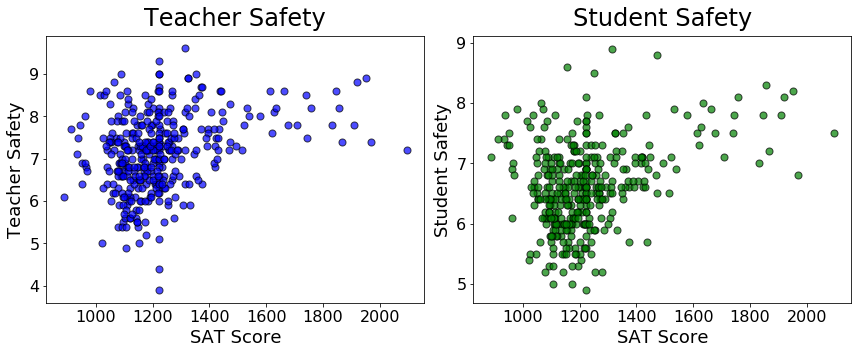

In [24]:
make_scatterplot(combined, "SAT Score", "Teacher Safety", "Student Safety")

Although there is a noticable positive correlations between both safety ratings and SAT Score, there aren't any noteable groups in either data entry. Since the average SAT score is around 1225, I will calculate the average teacher and student safety ratings for schools with an average SAT score of 1525 (+300) and of those below 1125 (-100).

In [25]:
SAT_above_1525 = combined[combined["SAT Score"] > 1525]
SAT_below_1125 = combined[combined["SAT Score"] < 1125]

teach_above_1525 = round(SAT_above_1525["Teacher Safety"].mean(), 1)
teach_below_1125 = round(SAT_below_1125["Teacher Safety"].mean(), 1)

stud_above_1525 = round(SAT_above_1525["Student Safety"].mean(), 1)
stud_below_1125 = round(SAT_below_1125["Student Safety"].mean(), 1)

print("Teacher Safety Rating for Schools with SAT Above 1525: {0}\nTeacher Safety Rating for Schools with SAT Below 1125: {1}".format(teach_above_1525, teach_below_1125))
print("")
print("Student Safety Rating for Schools with SAT Above 1525: {0}\nStudent Safety Rating for Schools with SAT Below 1125: {1}".format(stud_above_1525, stud_below_1125))


Teacher Safety Rating for Schools with SAT Above 1525: 8.1
Teacher Safety Rating for Schools with SAT Below 1125: 6.9

Student Safety Rating for Schools with SAT Above 1525: 7.6
Student Safety Rating for Schools with SAT Below 1125: 6.5


In the subsets selected, teachers feel safer on average than students do. Furthermore, both teachers and stduents consider schools that score above 1525 on the SAT exam to be more than one point safer than schools that score below 1125 on the SAT exam.

Next I will save the changes I made to the combined.csv file.

In [26]:
combined.to_csv('combined.csv', index=False)

## 3. Results

There are several conclusions to make from this examination:
1. Both larger schools and schools with a larger average class size perform better on the SAT exam.
    - All high schools (except one) that have an SAT below 1000 have less than 500 students, which is almost 300 students less than the high school average school.
    - Considering all but one of these schools has more than 79% ELL students, it's reasonable to assume the small enrollment size is due to the specialization of the school in helping students struggling in English.
2. Schools with many English Language Learners perform poorly on the SAT exam.
    - All but one of the top performing schools (average SAT greater than 1600) have between 0% and 0.5% ELL students.
    - All but one of the schools with at least 60% ELL students performs below average on the SAT exam.
    - The average SAT score for schools with at least 60% ELL students is almost 200 points below aveage.
3. Majority-male schools perform slightly worse on the SAT exam than majority-female schools.
4. Schools with a large percentage of white and Asian students perform better on the SAT than schools with a large percentage of black and Hispanic students.
    - The average NYC high school is 8.4% white, 36.6% black, 44.1% Hispanic, and 10.1% Asian.
    - Over 72% of high schools have an average SAT score of less than 1400, are less than 10% white, and are less than 10% Asian.
    - High schools with an average SAT score above 1600 have more than 4.5x as many white students and more than 3.5x as many Asian students as the average NYC high school.
    - The average NYC high school has more than 3.5x as many black studetns and more than 3x as many Hispanic students as high schools with an average SAT score above 1600.
5. Schools that teachers and students consider safe perform better on the SAT exam.
    - Schools with an SAT score above 1525 have an average teacher safety rating of 8.1 and an average student safety rating of 7.6.
    - Schools with an SAT score below 1125 have an average teacher safety rating of 6.9 and an average student safety rating of 6.5.